# Two qubits gate coupled with Josephson junction

In this project, we will use the two qubit CNOT gate. A CNOT gate (short for Controlled NOT gate) is a two-qubit gate in quantum computing that is used for performing logical operations on qubits. The CNOT gate operates on two qubits, known as the control qubit and the target qubit, and performs a NOT operation (a bit-flip) on the target qubit only if the control qubit is in the state |1⟩. If the control qubit is in the state |0⟩, then the target qubit remains in its original state.

The CNOT gate is represented by the following matrix:

 $\left[\begin{array}{cccc}
1 & 0 & 0 & 0	\\
0 & 1 & 0 & 0	\\
0 & 0 & 0 & 1	\\
0 & 0 & 1 & 0
\end{array}\right]$

In this matrix representation, the first two columns represent the control qubit being in the |0⟩ and |1⟩ states, respectively, and the last two columns represent the NOT operation being applied to the target qubit if the control qubit is in the |1⟩ state.

The CNOT gate is an essential building block in many quantum algorithms, including quantum error correction codes and quantum teleportation. It is also commonly used in quantum circuits for entangling multiple qubits and performing various logical operations on them.

In our work, we implement two qubit CNOT gate coupled with Josephson junction. A Josephson junction is a device that consists of two superconducting electrodes separated by a thin insulating layer (known as the Josephson tunnel barrier). When a voltage is applied across the electrodes, a supercurrent can flow across the barrier, leading to a Josephson effect. This effect is characterized by a phase difference between the wave functions of the superconducting electrons on either side of the tunnel barrier.

We start with the Hamiltonian of the system: 

\begin{equation*} 
  H = \sum 4E_c(n_g-n)^2 \; | n \rangle \langle n | \;  - \frac{E_j}{2}\sum (\; | n \rangle \langle n+1 | \;)  + \; | n+1 \rangle \langle n | \;  ) 
\label{eq:Hamiltonian1} \tag{1}
\end{equation*}

The Hamiltonian is, with good approximation, diagonal in the $| n \rangle$ basis for almost every value of $n_g$ because $E_C \gg E_J$. Thus, the charge states $| n \rangle$ are weakly mixed by the $E_J$ term. . An important
exception is the case of half-integer $n_g$.  Indeed, if $n_g$ is half-integer the charging energies of the
    two states $| n_g - \frac{1}{2} \rangle$ and $| n_g + \frac{1}{2} \rangle$ are equal and the $E_J$ term mixes strongly the two states. At low temperatures ($T \gg \frac{E_C}{k_B}$) the dynamic of the system is limited to these two states. We assume $n_g$ ∈ [0,1] in the following calculations. The Hamiltonian , written in spin-1/2 notation and restricted to the states $| 0 \rangle$, |$| 1 \rangle$, simplifies to:
    
The Hailtonian of the system for 2 qubits can be written as:
\begin{equation}
  H = \sum_{n1, n2}^{} \left[E_c (n_{g1} - n_1)^2 + E_c (n_{g2} - n_2)^2  \right]  \times \; | n_1 \rangle \langle n_2 | \;  -  \frac{E_j}{2} [ \; | n_1,n_2 \rangle \langle n_1,n_2 | \;  +  \; | n_1,(n_2+1) \rangle \langle (n_1+1),(n_2+1) | \; ] - \frac{E_j}{2} [ \; | n_1,n_2 \rangle \langle n_1,(n_2+1) | \;  + \; | (n_1+1),n_2 \rangle \langle (n_1+1),(n_2+1) | \;  ]  
\label{eq:Hamiltonian2} \tag{2}
\end{equation} 
  

We can transform those bra and ket into pauli matrix $\sigma_x$ $\sigma_y $ and $\sigma_z$


$H = E_c (\sigma_z  (n_1 - n_{g1})^2 + (n_2 - n_{g2})^2  \sigma_z) - \frac{E_j}{2} (\sigma_x  \sigma_x)$

Where: 
- $n_1$ and $n_2$ are the occupation numbers of the two quantum dots
- $n_{g1}$ and $n_{g2}$ are the gate charges for qubits 1 and 2, respectively
- $E_c$ is the charging energy
- $E_j$ is the Josephson energy




-------------------------------------------------------------------------------------------------------------------------

ref [1]: Yu. A. Pashkin, O. Astafiev, T. Yamamoto, Y. Nakamura, J. S. Tsai. "Josephson charge qubits: a brief review"

ref [2]: Simone Montangero, Tommaso Calarco, and Rosario Fazio. "Robust optimal quantum gates for Josephson charge qubits"

ref [3]: Rosario Fazio, G. Massimo Palma, and Jens Siewert. "Fidelity and leakage of Josephson qubits"

----------------------------------------------------------------------------------------------------------------

In [1]:
%matplotlib inline
import qutip as qt
from qutip import *
from pylab import *
from scipy import *
from scipy.integrate import solve_ivp
from scipy.linalg import expm
from scipy import integrate, optimize
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import string
import time

Unperturbed Hamiltonian $H = -\frac{1}{2} B_x^1 \sigma_x^{(1)} -\frac{1}{2} B_z^1 \sigma_z^{(1)} -\frac{1}{2} B_x^2 \sigma_x^{(2)} -\frac{1}{2} B_z^2 \sigma_z^{(2)} + E_{CC}\ \sigma_z^{(1)} \sigma_z^{(2)}$ <br>
Perturbed Hamiltonian $H = -\frac{1}{2} B_x^1 \sigma_x^{(1)} -\frac{1}{2} B_z^1 \sigma_z^{(1)} -\frac{1}{2} B_x^2 \sigma_x^{(2)} -\frac{1}{2} B_z^2 \sigma_z^{(2)} + E_{CC}\ \sigma_z^{(1)} \sigma_z^{(2)} + \beta \sigma_z^{(1)} + \beta \sigma_z^{(2)}$<br>

$CNOT \propto H^{(2)}\ \left[U_z^1(-\pi/2)\ U_z^2(-\pi/2)\ \exp{\left(i\frac{\pi}{4} \sigma_z^1 \sigma_z^2 \right)}\right]\ H^{(2)}$

In [2]:
# Define parameters for Hamiltonian
Ej1 = 0.005
Ej2 = 0.005
ng = 0
Ec1 = 1
Ec2 = 1

# Define Pauli matrices
sigmax = np.array([[0, 1], [1, 0]])
sigmay = np.array([[0, -1j], [1j, 0]])
sigmaz = np.array([[1, 0], [0, -1]])
Had = np.sqrt(0.5)*np.array([[1, 1], [1, -1]])

# Define ideal CNOT gate matrix
CNOT_ideal = np.array([[1, 0, 0, 0], 
                       [0, 1, 0, 0], 
                       [0, 0, 0, 1], 
                       [0, 0, 1, 0]])

# Definetwo-qubits Hamiltonian
#t: time dependence of the function
#Y: function variable
def Hamil_noisy(t,Y,Ej1,Ec1,Ej2,Ec2,ng,Ecc,Beta1,Beta2):
    
    H = -0.5*(Ej1)*np.matmul(np.kron(sigmax,np.identity(2)), Y) + (- 0.5*(Ec1*(1-2*ng))+Beta1)*np.matmul(np.kron(sigmaz,np.identity(2)), Y) - 0.5*(Ej2)*np.matmul(np.kron(np.identity(2),sigmax), Y) + (- 0.5*(Ec2*(1-2*ng))+Beta2)*np.matmul(np.kron(np.identity(2),sigmaz), Y) +Ecc*np.matmul(np.kron(sigmaz,sigmaz), Y)
    return H

# Define utility function to be used in time evolution described by Schroedinger equation
def H2Q_noisy_divI(t,Y,Ej1,Ec1,Ej2,Ec2,ng,Ecc,Beta1,Beta2):

    
    return Hamil_noisy(t,Y,Ej1,Ec1,Ej2,Ec2,ng,Ecc,Beta1,Beta2)/(0+1.0j)

# Define Unperturbed two-qubits Hamiltonian
def Hamil(t,Y,Ej1,Ec1,Ej2,Ec2,ng,Ecc):
    
    return Hamil_noisy(t,Y,Ej1,Ec1,Ej2,Ec2,ng,Ecc,0,0)

# Define utility function to be used in time evolution described by Schroedinger equation
def H2Q_divI(t,Y,Ej1,Ec1,Ej2,Ec2,ng,Ecc):
    
    return H2Q_noisy_divI(t,Y,Ej1,Ec1,Ej2,Ec2,ng,Ecc,0,0)


### Ideal gate

In [3]:
# initializations
Ec = Ec1 
BZ = 4*Ec*(1-2*ng)
BZ1 = BZ
BZ2 = BZ
ECC = 1

tau1 = np.pi/(4*np.abs(ECC))
tau2 = np.pi/(2*np.abs(BZ))


ket00_t = np.array([1+0.0j,0+0.0j,0+0.0j,0+0.0j])
ket01_t = np.array([0+0.0j,1+0.0j,0+0.0j,0+0.0j])
ket10_t = np.array([0+0.0j,0+0.0j,1+0.0j,0+0.0j])
ket11_t = np.array([0+0.0j,0+0.0j,0+0.0j,1+0.0j])


# apply Hadamard gate
ket00_t = np.matmul(np.kron(np.identity(2),Had), ket00_t)
ket01_t = np.matmul(np.kron(np.identity(2),Had), ket01_t)
ket10_t = np.matmul(np.kron(np.identity(2),Had), ket10_t)
ket11_t = np.matmul(np.kron(np.identity(2),Had), ket11_t)



# apply exp(i pi/4 sigmazDOTsigmaz) Where Bx = 0 = Bz, E_CC ≠ 0, tau = pi / (4 |E_CC|) if E_CC<0

sol = integrate.solve_ivp(H2Q_divI, t_span=(0,tau1), y0=ket00_t, args=(0,0,0,0,0,ECC), method='DOP853')
ket00_t = sol.y[:,-1]

sol = integrate.solve_ivp(H2Q_divI, t_span=(0,tau1), y0=ket01_t, args=(0,0,0,0,0,ECC), method='DOP853')
ket01_t = sol.y[:,-1]

sol = integrate.solve_ivp(H2Q_divI, t_span=(0,tau1), y0=ket10_t, args=(0,0,0,0,0,ECC), method='DOP853')
ket10_t = sol.y[:,-1]

sol = integrate.solve_ivp(H2Q_divI, t_span=(0,tau1), y0=ket11_t, args=(0,0,0,0,0,ECC), method='DOP853')
ket11_t = sol.y[:,-1]



# apply Uz Where: Bx = 0 = E_CC, Bz ≠ 0, tau  = pi / (2 |Bz|) if Bz<0

sol = integrate.solve_ivp(H2Q_divI, t_span=(tau1,tau1+tau2), y0=ket00_t, args=(0,BZ1,0,BZ2,0,0), method='DOP853')
ket00_t = sol.y[:,-1]

sol = integrate.solve_ivp(H2Q_divI, t_span=(tau1,tau1+tau2), y0=ket01_t, args=(0,BZ1,0,BZ2,0,0), method='DOP853')
ket01_t = sol.y[:,-1]

sol = integrate.solve_ivp(H2Q_divI, t_span=(tau1,tau1+tau2), y0=ket10_t, args=(0,BZ1,0,BZ2,0,0), method='DOP853')
ket10_t = sol.y[:,-1]

sol = integrate.solve_ivp(H2Q_divI, t_span=(tau1,tau1+tau2), y0=ket11_t, args=(0,BZ1,0,BZ2,0,0), method='DOP853')
ket11_t = sol.y[:,-1]



# apply Hadamard gate
ket00_t = np.matmul(np.kron(np.identity(2),Had), ket00_t)
ket01_t = np.matmul(np.kron(np.identity(2),Had), ket01_t)
ket10_t = np.matmul(np.kron(np.identity(2),Had), ket10_t)
ket11_t = np.matmul(np.kron(np.identity(2),Had), ket11_t)



# normalize vectors
ket00_t /= np.linalg.norm(ket00_t)
ket01_t /= np.linalg.norm(ket01_t)
ket10_t /= np.linalg.norm(ket10_t)
ket11_t /= np.linalg.norm(ket11_t)


# matrix representation of the perfect CNOT gate
Ideal_CNOT = np.array([ket00_t,ket01_t,ket10_t,ket11_t])
print(Ideal_CNOT)


[[7.07106787e-01+7.07106775e-01j 3.97759193e-09-7.60568688e-09j
  0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j]
 [3.97759193e-09-7.60568688e-09j 7.07106787e-01+7.07106775e-01j
  0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j]
 [0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j
  7.94499613e-09-4.31690218e-09j 7.07106775e-01+7.07106787e-01j]
 [0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j
  7.07106775e-01+7.07106787e-01j 7.94499613e-09-4.31690218e-09j]]


In [4]:
# Define the desired state as the excited state of the Hamiltonian
Ecc = -0.1
evolution_time = 0.1
H = Hamil(0, np.identity(4), Ej1, Ec1, Ej2, Ec2, ng, Ecc)
U = expm(-1j * H * evolution_time)

# Define the input state |psi_in> |00>
psi_in = (ket00_t + ket11_t) / np.sqrt(2)

# Define the desired state |psi_des>
psi_des = dot(U, psi_in)

# Compute the fidelity
fidelity = np.abs(np.dot(psi_des.T.conj(), psi_in))**2
print("Fidelity:", fidelity)

Fidelity: 0.9964042557557686


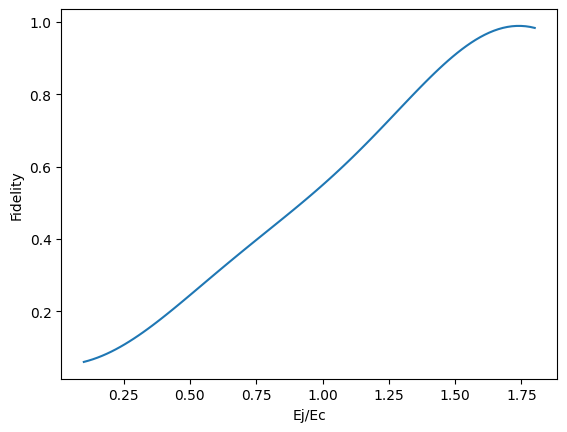

In [5]:
# Define range of Ej/Ec values
Ej_Ec_range = np.linspace(0.1, 1.8, 100)

# Compute fidelity for each Ej/Ec value
fidelity_values = []
for Ej_Ec in Ej_Ec_range:
    Ej1 = Ej_Ec * Ec1
    Ej2 = Ej_Ec * Ec2
    evolution_time = 3
    H_noisy = Hamil(0.1, np.identity(4), Ej1, Ec1, Ej2, Ec2, ng, Ecc)
    U = expm(-1j * H_noisy * evolution_time)
    psi_in = (ket00_t + ket01_t) / np.sqrt(2)
    psi_des = dot(U, psi_in)
    fidelity = np.abs(np.matmul(psi_des.T.conj(), psi_in))**2
    fidelity_values.append(fidelity)

# Plot the fidelity as a function of Ej/Ec
plt.plot(Ej_Ec_range, fidelity_values)
plt.xlabel('Ej/Ec')
plt.ylabel('Fidelity')
plt.savefig('Ideal_CNOT.png')
plt.show()

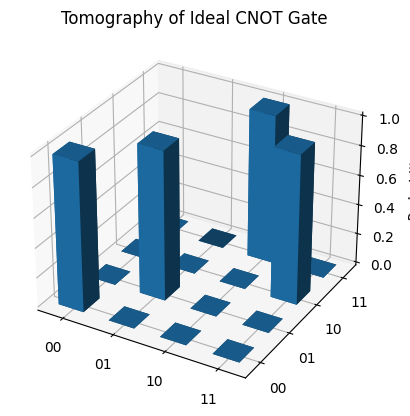

In [6]:
# show 3D histogram of the ideal CNOT gate
d = 0.25

fig = plt.figure(clear=True)
ax = fig.add_subplot(projection='3d')

plt.xticks(ticks=[0,1,2,3], labels=['00','01','10','11'])
plt.yticks(ticks=[0,1,2,3], labels=['00','01','10','11'])


ax.bar3d(x=np.array([0-d,0-d,0-d,0-d,1-d,1-d,1-d,1-d,2-d,2-d,2-d,2-d,3-d,3-d,3-d,3-d]), y=np.array([0-d,1-d,2-d,3-d,0-d,1-d,2-d,3-d,0-d,1-d,2-d,3-d,0-d,1-d,2-d,3-d]), z=np.zeros(16),
         dx=2*d, dy=2*d, dz=np.abs(Ideal_CNOT).reshape(16))

plt.xlabel('')
plt.ylabel('')
ax.set_zlabel('Probability')
plt.title("Tomography of Ideal CNOT Gate")
plt.savefig('Ideal_top.png')
plt.show()

### Noisy CNOT gate

In [7]:
# integrate the time-dependent Schrodinger equation for the four base states

# initializations
BX = 1.0
BZ = -1.0*BX
BETA = 0.02*BZ

BX1 = BX
BZ1 = BZ
BX2 = BX
BZ2 = BZ
ECC = -0.1*np.abs(BZ)
BETA1 = BETA
BETA2 = BETA

tau1 = np.pi/(4*np.abs(ECC))
tau2 = np.pi/(2*np.abs(BZ))


ket00_t = np.array([1+0.0j,0+0.0j,0+0.0j,0+0.0j])
ket01_t = np.array([0+0.0j,1+0.0j,0+0.0j,0+0.0j])
ket10_t = np.array([0+0.0j,0+0.0j,1+0.0j,0+0.0j])
ket11_t = np.array([0+0.0j,0+0.0j,0+0.0j,1+0.0j])


# apply Hadamard gate
ket00_t = np.matmul(np.kron(np.identity(2),Had), ket00_t)
ket01_t = np.matmul(np.kron(np.identity(2),Had), ket01_t)
ket10_t = np.matmul(np.kron(np.identity(2),Had), ket10_t)
ket11_t = np.matmul(np.kron(np.identity(2),Had), ket11_t)



# apply exp(i pi/4 sigmazDOTsigmaz) Where Bx = 0 = Bz, E_CC ≠ 0, tau1 = pi / (4 |E_CC|) if E_CC<0

sol = integrate.solve_ivp(H2Q_noisy_divI, t_span=(0,tau1), y0=ket00_t, args=(0,0,0,0,0,ECC,BETA1,BETA2), method='DOP853')
ket00_t = sol.y[:,-1]

sol = integrate.solve_ivp(H2Q_noisy_divI, t_span=(0,tau1), y0=ket01_t, args=(0,0,0,0,0,ECC,BETA1,BETA2), method='DOP853')
ket01_t = sol.y[:,-1]

sol = integrate.solve_ivp(H2Q_noisy_divI, t_span=(0,tau1), y0=ket10_t, args=(0,0,0.0,0.0,0,ECC,BETA1,BETA2), method='DOP853')
ket10_t = sol.y[:,-1]

sol = integrate.solve_ivp(H2Q_noisy_divI, t_span=(0,tau1), y0=ket11_t, args=(0,0,0,0,0,ECC,BETA1,BETA2), method='DOP853')
ket11_t = sol.y[:,-1]



# apply Uz Where Bx = 0 = E_CC, Bz ≠ 0, tau2  = pi / (2 |Bz|) if Bz<0

sol = integrate.solve_ivp(H2Q_noisy_divI, t_span=(tau1,tau1+tau2), y0=ket00_t, args=(0,BZ1,0,BZ2,0,0,BETA1,BETA2), method='DOP853')
ket00_t = sol.y[:,-1]

sol = integrate.solve_ivp(H2Q_noisy_divI, t_span=(tau1,tau1+tau2), y0=ket01_t, args=(0,BZ1,0,BZ2,0,0,BETA1,BETA2), method='DOP853')
ket01_t = sol.y[:,-1]

sol = integrate.solve_ivp(H2Q_noisy_divI, t_span=(tau1,tau1+tau2), y0=ket10_t, args=(0,BZ1,0,BZ2,0,0,BETA1,BETA2), method='DOP853')
ket10_t = sol.y[:,-1]

sol = integrate.solve_ivp(H2Q_noisy_divI, t_span=(tau1,tau1+tau2), y0=ket11_t, args=(0,BZ1,0,BZ2,0,0,BETA1,BETA2), method='DOP853')
ket11_t = sol.y[:,-1]



# apply Hadamard gate
ket00_t = np.matmul(np.kron(np.identity(2),Had), ket00_t)
ket01_t = np.matmul(np.kron(np.identity(2),Had), ket01_t)
ket10_t = np.matmul(np.kron(np.identity(2),Had), ket10_t)
ket11_t = np.matmul(np.kron(np.identity(2),Had), ket11_t)



# normalize vectors
ket00_t /= np.linalg.norm(ket00_t)
ket01_t /= np.linalg.norm(ket01_t)
ket10_t /= np.linalg.norm(ket10_t)
ket11_t /= np.linalg.norm(ket11_t)


# matrix representation of the perturbed CNOT gate
Noisy_CNOT = np.array([ket00_t,ket01_t,ket10_t,ket11_t])
print(Noisy_CNOT)

[[0.81243079-0.55212713j 0.10532392+0.15497974j 0.        +0.j
  0.        +0.j        ]
 [0.10532392+0.15497974j 0.81243079-0.55212713j 0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.15497974+0.10532392j
  0.55212713-0.81243079j]
 [0.        +0.j         0.        +0.j         0.55212713-0.81243079j
  0.15497974+0.10532392j]]


In [8]:
# Define the desired state as the excited state of the Hamiltonian
Ecc = 1
Beta1 = 0.1
Beta2 = 0.1
evolution_time = 0.1
H = Hamil_noisy(0, np.identity(4), Ej1, Ec1, Ej2, Ec2, ng, Ecc, Beta1, Beta2)
U = expm(-1j * H * evolution_time)

# Define the input state |psi_in> |00>
psi_in = (ket00_t + ket11_t) / np.sqrt(2)

# Define the desired state |psi_des>
psi_des = dot(U, psi_in)

# Compute the fidelity
fidelity = np.abs(np.dot(psi_des.T.conj(), psi_in))**2
print("Fidelity:", fidelity)

Fidelity: 0.9865221015210696


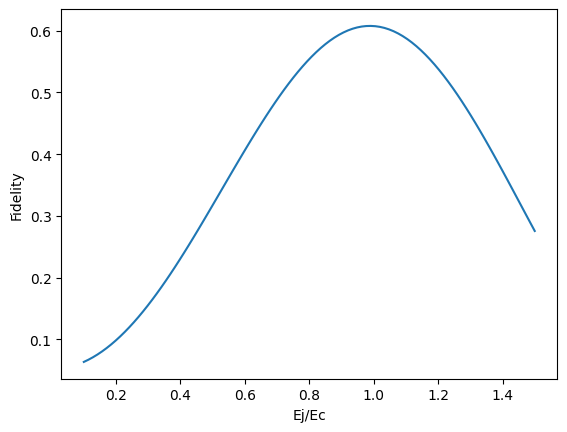

In [9]:
# Define range of Ej/Ec values
Ej_Ec_range = np.linspace(0.1, 1.5, 100)

# Compute fidelity for each Ej/Ec value
fidelity_values = []
for Ej_Ec in Ej_Ec_range:
    Ej1 = Ej_Ec * Ec1
    Ej2 = Ej_Ec * Ec2
    evolution_time = 3
    H_noisy = Hamil_noisy(0, np.identity(4), Ej1, Ec1, Ej2, Ec2, ng, Ecc, Beta1, Beta2)
    U = expm(-1j * H_noisy * evolution_time)
    psi_in = (ket00_t + ket01_t) / np.sqrt(2)
    psi_des = dot(U, psi_in)
    fidelity = np.abs(np.matmul( psi_in,psi_des.T.conj()))**2
    fidelity_values.append(fidelity)

# Plot the fidelity as a function of Ej/Ec
plt.plot(Ej_Ec_range, fidelity_values)
plt.xlabel('Ej/Ec')
plt.ylabel('Fidelity')
plt.savefig('Per_CNOT.png')
plt.show()

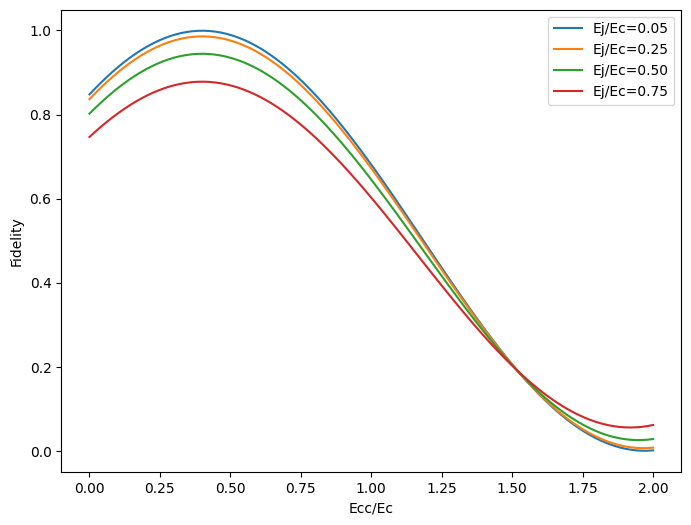

In [10]:
# Define range of Ej/Ec values
Ej_Ec_range = [0.05, 0.25, 0.5,0.75]

# Define range of Ecc/Ec values
Ecc_Ec_range = np.linspace(0, 2, 100)

# Compute fidelity for each Ej/Ec and Ecc/Ec value
fidelity_values = np.zeros((len(Ej_Ec_range), len(Ecc_Ec_range)))
for i, Ej_Ec in enumerate(Ej_Ec_range):
    Ej1 = Ej_Ec * Ec1
    Ej2 = Ej_Ec * Ec2
    for j, Ecc_Ec in enumerate(Ecc_Ec_range):
        Ecc = Ecc_Ec * Ec1
        evolution_time = 1
        H_noisy = Hamil_noisy(0, np.identity(4), Ej1, Ec1, Ej2, Ec2, ng, Ecc, Beta1, Beta2)
        U = expm(-1j * H_noisy * evolution_time)
        psi_in = (ket00_t + ket01_t) / np.sqrt(2)
        psi_des = dot(U, psi_in)
        fidelity = np.abs(np.matmul( psi_in,psi_des.T.conj()))**2
        fidelity_values[i,j] = fidelity

# Plot the fidelity as a function of Ecc/Ec
plt.figure(figsize=(8,6))
for i, Ej_Ec in enumerate(Ej_Ec_range):
    plt.plot(Ecc_Ec_range, fidelity_values[i,:], label='Ej/Ec={:.2f}'.format(Ej_Ec))
plt.xlabel('Ecc/Ec')
plt.ylabel('Fidelity')
plt.legend()
plt.show()


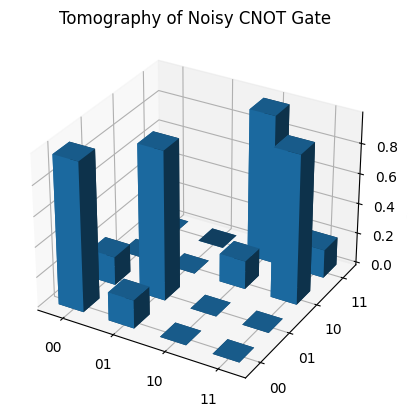

In [11]:
# show 3D histogram of the perturbed CNOT gate
d = 0.25

fig = plt.figure(clear=True)
ax = fig.add_subplot(projection='3d')

plt.xticks(ticks=[0,1,2,3], labels=['00','01','10','11'])
plt.yticks(ticks=[0,1,2,3], labels=['00','01','10','11'])


ax.bar3d(x=np.array([0-d,0-d,0-d,0-d,1-d,1-d,1-d,1-d,2-d,2-d,2-d,2-d,3-d,3-d,3-d,3-d]), y=np.array([0-d,1-d,2-d,3-d,0-d,1-d,2-d,3-d,0-d,1-d,2-d,3-d,0-d,1-d,2-d,3-d]), z=np.zeros(16),
         dx=2*d, dy=2*d, dz=np.abs(Noisy_CNOT).reshape(16))

plt.xlabel('')
plt.ylabel('')
ax.set_zlabel('Probability')
plt.title("Tomography of Noisy CNOT Gate")
plt.savefig('Per_top.png')
plt.show()

The plot shows us a 3D histogram of the ideal CNOT gate. The plot shows the ideal gate acting on each of the four possible input states(00, 01, 10, and 11), resulting in perfect entanglement between the control and target qubits. The plot can be used as a reference to compare with the perturbed CNOT gate plot and assess the fidelity of the gate operation.